# Explore Basis Trade Data


In [2]:
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set()

# Import project configurations
from settings import config
import load_bases_data

# Retrieve directory paths from the configuration
DATA_DIR = config("DATA_DIR")
MANUAL_DATA_DIR = config("MANUAL_DATA_DIR")


In [3]:

df = load_bases_data.load_combined_spreads_wide(data_dir=MANUAL_DATA_DIR)

df = df.ffill(limit=5).dropna()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1923 entries, 2011-09-27 to 2020-10-06
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Box_06m            1923 non-null   float32
 1   Box_12m            1923 non-null   float32
 2   Box_18m            1923 non-null   float32
 3   CDS_Bond_HY        1923 non-null   float32
 4   CDS_Bond_IG        1923 non-null   float32
 5   CIP_AUD            1923 non-null   float32
 6   CIP_CAD            1923 non-null   float32
 7   CIP_CHF            1923 non-null   float32
 8   CIP_EUR            1923 non-null   float32
 9   CIP_GBP            1923 non-null   float32
 10  CIP_JPY            1923 non-null   float32
 11  CIP_NZD            1923 non-null   float32
 12  CIP_SEK            1923 non-null   float32
 13  Eq_SF_Dow          1923 non-null   float32
 14  Eq_SF_NDAQ         1923 non-null   float32
 15  Eq_SF_SPX          1923 non-null   float32
 16  TIPS_T

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1923 entries, 2011-09-27 to 2020-10-06
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Box_06m            1923 non-null   float32
 1   Box_12m            1923 non-null   float32
 2   Box_18m            1923 non-null   float32
 3   CDS_Bond_HY        1923 non-null   float32
 4   CDS_Bond_IG        1923 non-null   float32
 5   CIP_AUD            1923 non-null   float32
 6   CIP_CAD            1923 non-null   float32
 7   CIP_CHF            1923 non-null   float32
 8   CIP_EUR            1923 non-null   float32
 9   CIP_GBP            1923 non-null   float32
 10  CIP_JPY            1923 non-null   float32
 11  CIP_NZD            1923 non-null   float32
 12  CIP_SEK            1923 non-null   float32
 13  Eq_SF_Dow          1923 non-null   float32
 14  Eq_SF_NDAQ         1923 non-null   float32
 15  Eq_SF_SPX          1923 non-null   float32
 16  TIPS_T

In [5]:
df.tail()

,Box_06m,Box_12m,Box_18m,CDS_Bond_HY,CDS_Bond_IG,CIP_AUD,CIP_CAD,CIP_CHF,CIP_EUR,CIP_GBP,...,Treasury_SF_10Y,Treasury_SF_20Y,Treasury_SF_30Y,Treasury_Swap_01Y,Treasury_Swap_02Y,Treasury_Swap_03Y,Treasury_Swap_05Y,Treasury_Swap_10Y,Treasury_Swap_20Y,Treasury_Swap_30Y
date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,40.555565,43.011848,41.711506,-136.982651,-18.245064,15.268238,36.371628,38.716438,35.219608,25.638702,...,13.161999,-23.264000,-14.365,-6.38,-9.4,-11.55,-13.6,-18.600000,-36.599998,-52.000000
2020-10-01,40.869366,43.152840,43.448586,-136.982651,-18.245064,11.937216,35.248646,34.527248,32.096199,24.128174,...,12.193999,-21.952999,-14.365,-6.20,-9.9,-10.80,-12.4,-18.100000,-37.900002,-52.500000
2020-10-02,40.517254,43.098312,42.546875,-136.982651,-18.245064,15.168867,33.604782,32.835171,31.647871,23.152693,...,8.674000,-26.825001,-14.365,-6.09,-9.0,-11.20,-12.7,-18.299999,-37.700001,-53.400002
2020-10-05,39.706650,43.044472,43.061104,-136.982651,-18.245064,11.945726,31.510820,32.519932,31.641478,22.843588,...,9.759999,-25.424000,-14.365,-5.76,-8.8,-12.10,-13.3,-19.200001,-38.400002,-54.799999
2020-10-06,39.934700,43.194530,43.193279,-136.982651,-18.245064,16.054800,30.344168,29.901834,29.395243,20.840437,...,4.132000,-35.338001,-14.365,-7.67,-8.7,-10.70,-15.0,-21.400000,-43.099998,-58.599998


In [6]:
# Reindex columns in sorted order and filter only columns that match the pattern "Treasury_SF_*"
filtered_df = df.reindex(sorted(df.columns), axis=1).filter(regex="^Treasury_SF_")

# Display dataset information
print(filtered_df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1923 entries, 2011-09-27 to 2020-10-06
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Treasury_SF_02Y  1923 non-null   float32
 1   Treasury_SF_05Y  1923 non-null   float32
 2   Treasury_SF_10Y  1923 non-null   float32
 3   Treasury_SF_20Y  1923 non-null   float32
 4   Treasury_SF_30Y  1923 non-null   float32
dtypes: float32(5)
memory usage: 52.6 KB
None


### ONly this Graph


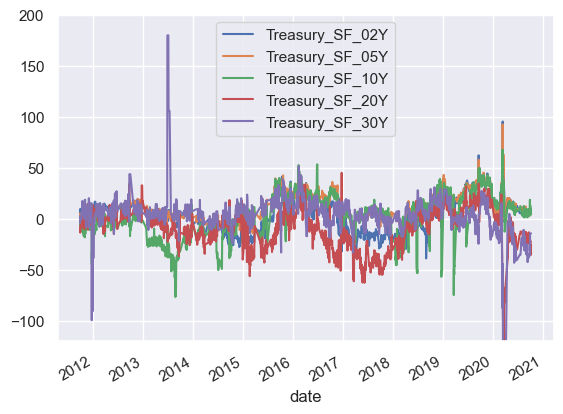

In [7]:
# Reindex columns in sorted order and filter only columns that match the pattern "Treasury_SF_*"
filtered_df = df.reindex(sorted(df.columns), axis=1).filter(regex="^Treasury_SF_")

# Plot the filtered data
filtered_df.plot()

# Set y-axis limits
plt.ylim(-120, 200)

# Show the plot
plt.show()

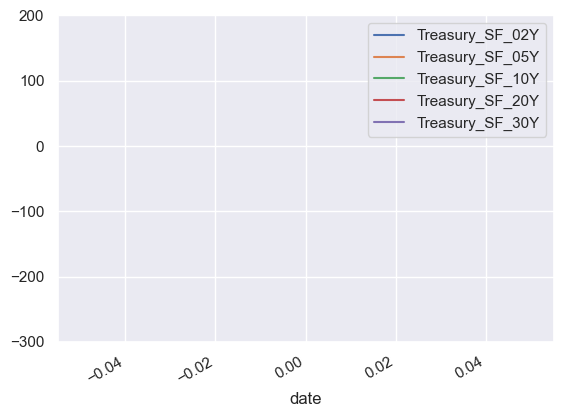

In [8]:
filtered_df = (
    df
    .loc["2023":, :] 
    .reindex(sorted(df.columns), axis=1) 
    .filter(regex="^Treasury_SF_")
)
filtered_df.plot()
plt.ylim(-300, 200)
plt.show()

(-300.0, 200.0)

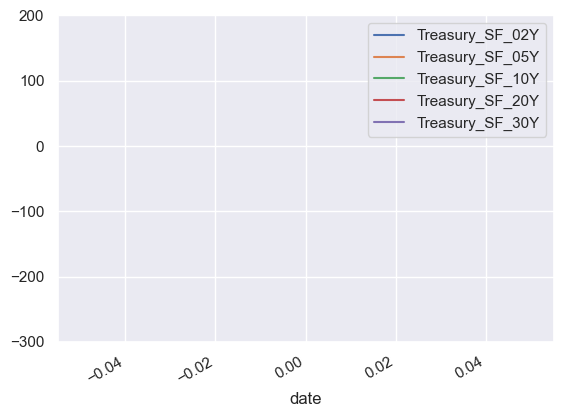

In [9]:
(
    df
    .loc["2024-07":,:]
    .reindex(sorted(df.columns), axis=1)
    .filter(regex=("Treasury_SF_*"))
    .plot()
)
plt.ylim([-300,200])

(-300.0, 200.0)

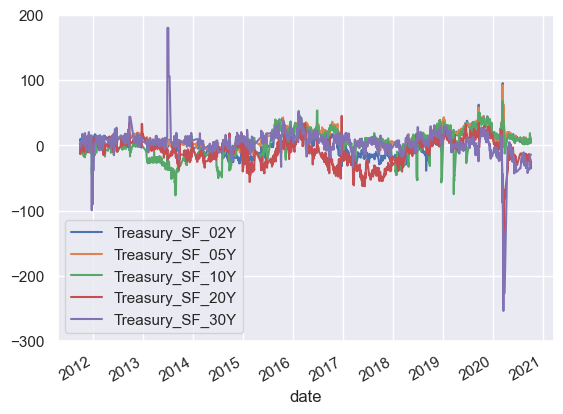

In [10]:
df.reindex(sorted(df.columns), axis=1).filter(regex=("Treasury_SF_*")).plot()
plt.ylim([-300,200])

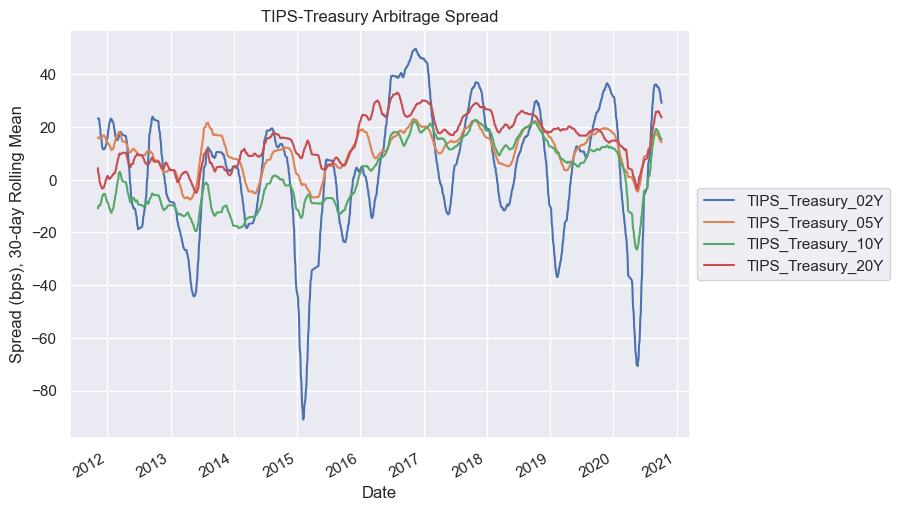

In [11]:

WINDOW = 30

ax = (
    df
    .reindex(sorted(df.columns), axis=1)  # Sort columns
    .filter(regex="^TIPS_")  # Select columns matching "TIPS_*"
    .rolling(WINDOW)
    .mean()
    .plot(figsize=(10, 6))  # Optional: Set figure size for better readability
)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.ylabel(f"Spread (bps), {WINDOW}-day Rolling Mean")
plt.xlabel("Date")
plt.title("TIPS-Treasury Arbitrage Spread")

# Show the plot
plt.show()


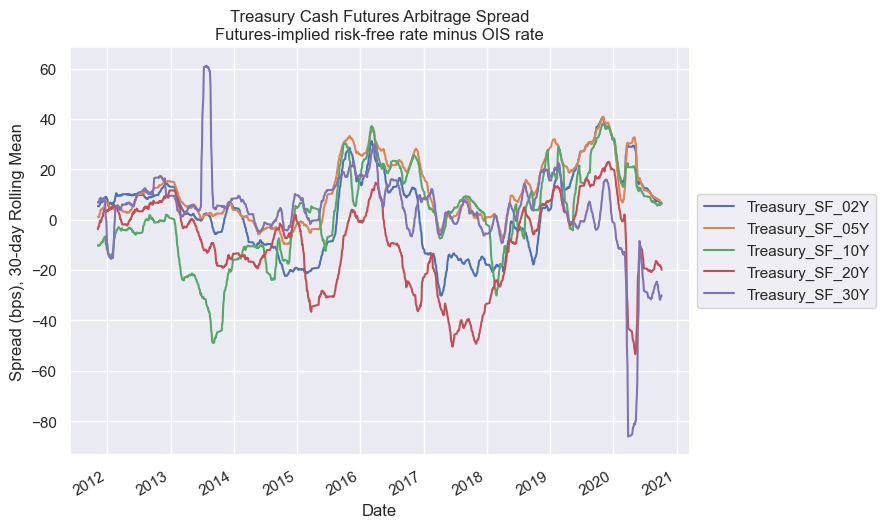

In [12]:

WINDOW = 30

ax = (
    df
    .reindex(sorted(df.columns), axis=1)  # Sort columns alphabetically
    .filter(regex="^Treasury_SF_")  # Select columns starting with "Treasury_SF_"
    .rolling(WINDOW)
    .mean()
    .plot(figsize=(10, 6))  # Set figure size for better readability
)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.ylabel(f"Spread (bps), {WINDOW}-day Rolling Mean")
plt.xlabel("Date")
plt.title(
    "Treasury Cash Futures Arbitrage Spread\n"
    "Futures-implied risk-free rate minus OIS rate"
)

plt.show()


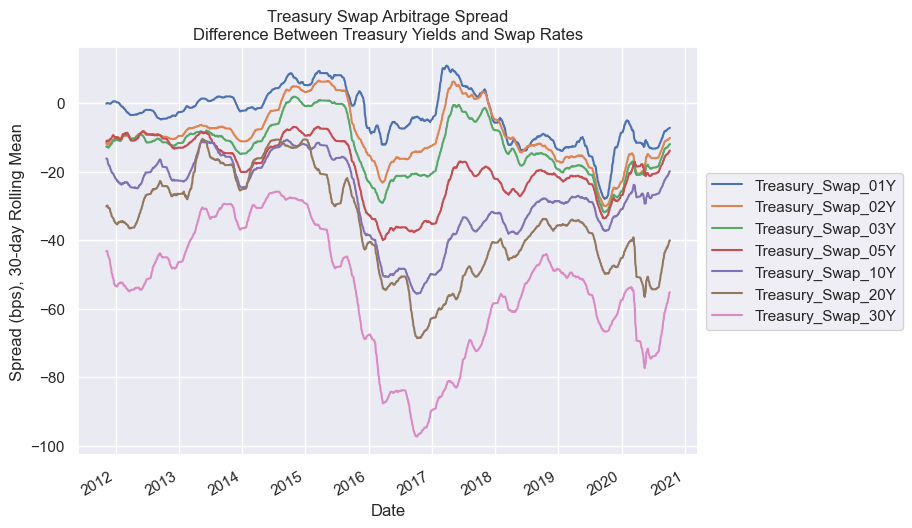

In [13]:

WINDOW = 30
ax = (
    df
    .reindex(sorted(df.columns), axis=1)  # Sort columns alphabetically
    .filter(regex="^Treasury_Swap_")  # Select columns starting with "Treasury_Swap_"
    .rolling(WINDOW)
    .mean()
    .plot(figsize=(10, 6))  # Set figure size for better readability
)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.ylabel(f"Spread (bps), {WINDOW}-day Rolling Mean")
plt.xlabel("Date")
plt.title("Treasury Swap Arbitrage Spread\nDifference Between Treasury Yields and Swap Rates")

plt.show()


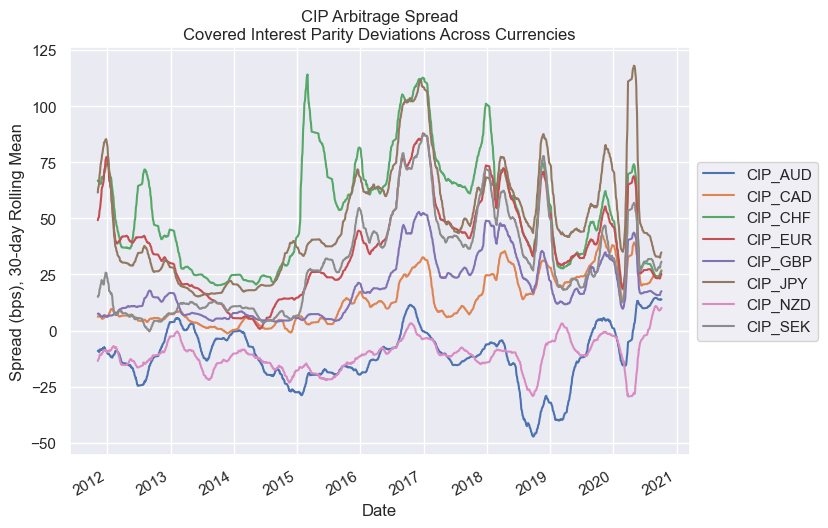

In [14]:
WINDOW = 30
ax = (
    df
    .reindex(sorted(df.columns), axis=1)  # Sort columns alphabetically
    .filter(regex="^CIP_")  # Select columns starting with "CIP_"
    .rolling(WINDOW)
    .mean()
    .plot(figsize=(10, 6))  # Set figure size for better readability
)

# Adjust legend position to the right of the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Set labels and title
plt.ylabel(f"Spread (bps), {WINDOW}-day Rolling Mean")
plt.xlabel("Date")
plt.title("CIP Arbitrage Spread\nCovered Interest Parity Deviations Across Currencies")

plt.show()


In [15]:
df

,Box_06m,Box_12m,Box_18m,CDS_Bond_HY,CDS_Bond_IG,CIP_AUD,CIP_CAD,CIP_CHF,CIP_EUR,CIP_GBP,...,Treasury_SF_10Y,Treasury_SF_20Y,Treasury_SF_30Y,Treasury_Swap_01Y,Treasury_Swap_02Y,Treasury_Swap_03Y,Treasury_Swap_05Y,Treasury_Swap_10Y,Treasury_Swap_20Y,Treasury_Swap_30Y
date,,,,,,,,,,,,,,,,,,,,,
2011-09-27,45.072651,44.550526,41.726276,-65.758499,-30.593292,-4.680377,4.611567,58.193066,45.790791,6.843071,...,-4.375000,-9.526000,-4.209,-0.75,-12.20,-13.10,-12.2,-15.100000,-31.799999,-46.200001
2011-09-28,47.076279,46.993877,44.676720,-59.540207,-26.807251,-3.314847,6.045585,69.976715,46.380501,8.465174,...,-7.341000,-13.625999,2.801,-2.20,-13.65,-12.70,-14.0,-17.900000,-35.200001,-49.000000
2011-09-29,46.560703,46.658489,43.207115,-52.346184,-22.032066,-5.564672,6.928679,65.311295,47.764858,9.252957,...,-6.438000,-9.951000,-1.001,0.00,-12.70,-10.60,-9.7,-10.900000,-29.600000,-42.099998
2011-09-30,48.782894,49.162678,43.783752,-42.784607,-18.220398,-5.894635,6.947424,66.881477,53.645248,8.261290,...,-3.063000,-6.101000,-1.001,-1.65,-10.65,-10.60,-11.5,-12.400000,-30.500000,-42.000000
2011-10-03,46.625263,50.413651,44.294552,-29.010574,-6.099808,-7.381009,8.171256,72.711632,53.925735,9.970319,...,-5.718000,-7.772000,-1.001,-0.05,-9.90,-10.20,-9.8,-13.100000,-31.700001,-45.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,40.555565,43.011848,41.711506,-136.982651,-18.245064,15.268238,36.371628,38.716438,35.219608,25.638702,...,13.161999,-23.264000,-14.365,-6.38,-9.40,-11.55,-13.6,-18.600000,-36.599998,-52.000000
2020-10-01,40.869366,43.152840,43.448586,-136.982651,-18.245064,11.937216,35.248646,34.527248,32.096199,24.128174,...,12.193999,-21.952999,-14.365,-6.20,-9.90,-10.80,-12.4,-18.100000,-37.900002,-52.500000
2020-10-02,40.517254,43.098312,42.546875,-136.982651,-18.245064,15.168867,33.604782,32.835171,31.647871,23.152693,...,8.674000,-26.825001,-14.365,-6.09,-9.00,-11.20,-12.7,-18.299999,-37.700001,-53.400002
